#Modern AI Pro: Using Multimodality in LLMs
We will do more image analysis here continuing from our earlier [notebook](https://colab.research.google.com/drive/1YJ5pxuESgwcc107pNVIxh7uD2SWxRPDY#scrollTo=BcGJIOJyVndA).

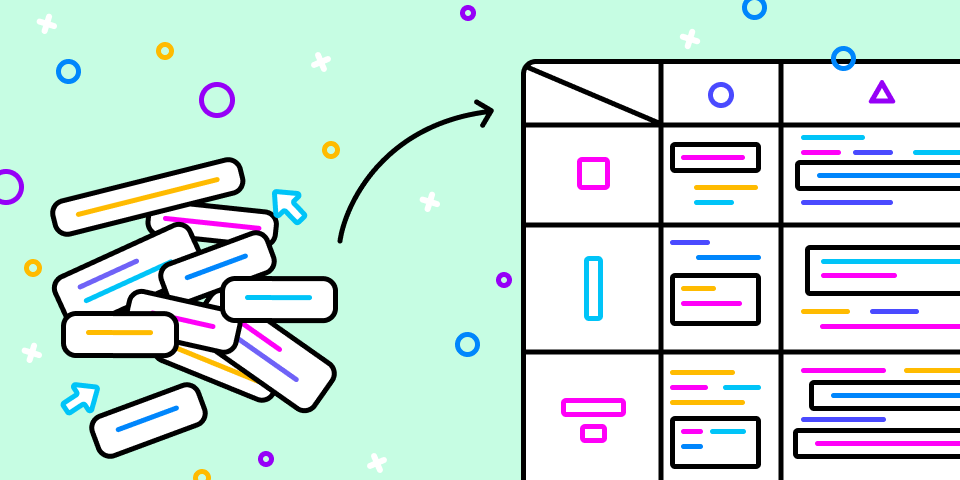

## Step 1: Setup the Multimodal LLMs

In [ ]:
!pip -q install llama-index-multi-modal-llms-openai llama-index-llms-azure-openai matplotlib llama-index-multi-modal-llms-azure-openai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.3 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
# We will use a simple utility to make the text wrap properly when printing.
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
# If you are using Azure OpenAI. If you are using OpenAI directly, skip this step and instead do the next cell.
from llama_index.core import Settings
from llama_index.multi_modal_llms.azure_openai import AzureOpenAIMultiModal

mm_llm = AzureOpenAIMultiModal(
    api_key=userdata.get('OPENAI_MSFT_KEY'),
    engine= userdata.get('AZURE_DEPLOYMENT'),
    azure_endpoint=userdata.get("AZURE_OPENAI_ENDPOINT"),
    api_version="2023-07-01-preview",
    max_new_tokens=1500
)

In [ ]:
!pip -q install llama-index-llms-azure-openai
from llama_index.llms.azure_openai import AzureOpenAI
llm = AzureOpenAI(
    api_key=userdata.get('OPENAI_MSFT_KEY'),
    engine= userdata.get('AZURE_DEPLOYMENT'),
    azure_endpoint=userdata.get("AZURE_OPENAI_ENDPOINT"),
    api_version="2023-07-01-preview",

)

In [ ]:
llm.complete("Give me a beautiful poem")

CompletionResponse(text="Certainly! Here's an original poem for you:\n\nBeneath the Sapphire Sky\n\nBeneath the sapphire sky we lie,\nIn fields where wildflowers dare to bloom,\nWith whispers of the wind's soft sigh,\nNature's brush strokes dispel the gloom.\n\nThe sun, a golden artist's flare,\nPaints the horizon with hues of fire,\nWhile the gentle hands of the air,\nCompose a melody to inspire.\n\nThe river's song, a silver thread,\nWeaves through the valley with grace,\nIts waters a mirror, lightly spread,\nReflecting the smile on your face.\n\nThe mountains stand, so proud and tall,\nTheir peaks like crowns of the earth,\nGuardians of the valley's hall,\nWitnesses to creation's birth.\n\nThe trees, in verdant splendor dressed,\nDance to the rhythm of the day,\nTheir leaves, in sunlight softly pressed,\nShimmer as they sway.\n\nThe stars, in the night's embrace,\nGleam like diamonds, pure and clear,\nEach a note in the vastness of space,\nA symphony for those who hear.\n\nBeneath t

In [ ]:
# If you are using OpenAI directly instead of through Azure deployment
!pip install llama-index-multi-modal-llms-openai openai
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=300
)

## Step 2: Prepare the image and send it to Multimodal LLM

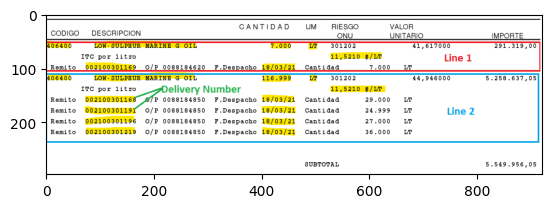

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('complex_table.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from llama_index.core.schema import ImageDocument
img = ImageDocument(image_path="complex_table.png")
complete_response = mm_llm.complete(
    prompt="Do your best to extract all the content from this image and format it well. ",
    image_documents=[img],
)
print(complete_response.text)

Line 1
CODIGO: 060400
DESCRIPCION: LOW-SULFUR MARINE OIL
CANTIDAD: 7,000
UM: L
RIESGO: 0
ONU: 301202
VALOR UNITARIO: 41,67000
IMPORTE: 291,319.00

Line 2
CODIGO: 060400
DESCRIPCION: LOW-SULFUR MARINE OIL
CANTIDAD: 116,999
UM: L
RIESGO: 0
ONU: 301202
VALOR UNITARIO: 1,511,290
IMPORTE: 5,258,637.05

Delivery Number
Ramito 001100031168 / OP 008814850 / Despacho 18/03/21
CANTIDAD: 29,000
UM: L
IMPORTE: 44.00

Ramito 001100031169 / OP 008814850 / Despacho 18/03/21
CANTIDAD: 27,000
UM: L
IMPORTE: 66.00

Ramito 001100031170 / OP 008814850 / Despacho 18/03/21
CANTIDAD: 27,000
UM: L
IMPORTE: 66.00

SUBTOTAL: 5,549,956.05


In [ ]:
chart = ImageDocument(image_path="chart.png")
complete_response = mm_llm.complete(
    prompt="The chart is about likability of robots. Explain the key summary of this.",
    image_documents=[chart],
)
print(complete_response.text)

The chart shows the likability of various robots based on two scenarios: when the robot might respond and when the robot might scare the participant. The robots included in the chart are Pepper, Mitra, 2-1 Mitra, Cruzr, Zenbo, Emi, and Atlas.

In the scenario where the robot might respond, Pepper and Mitra have the highest likability, with scores close to 0.8. 2-1 Mitra, Cruzr, and Zenbo have moderate likability, with scores ranging from 0.4 to 0.6. Emi and Atlas have the lowest likability, with scores below 0.4.

In the scenario where the robot might scare the participant, the likability scores are generally lower. Pepper and Mitra still have the highest likability, but their scores are closer to 0.6. 2-1 Mitra, Cruzr, and Zenbo have scores around 0.4, while Emi and Atlas have scores below 0.2.

Overall, the chart suggests that Pepper and Mitra are the most likable robots, regardless of the scenario. Emi and Atlas are the least likable, and the other robots fall somewhere in between.


## Step 3: Now let's process PDFs

In [ ]:
!pip install -q pdf2image unstructured[all-docs]
!apt-get install poppler-utils
!apt install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


**Load and Display PDF**

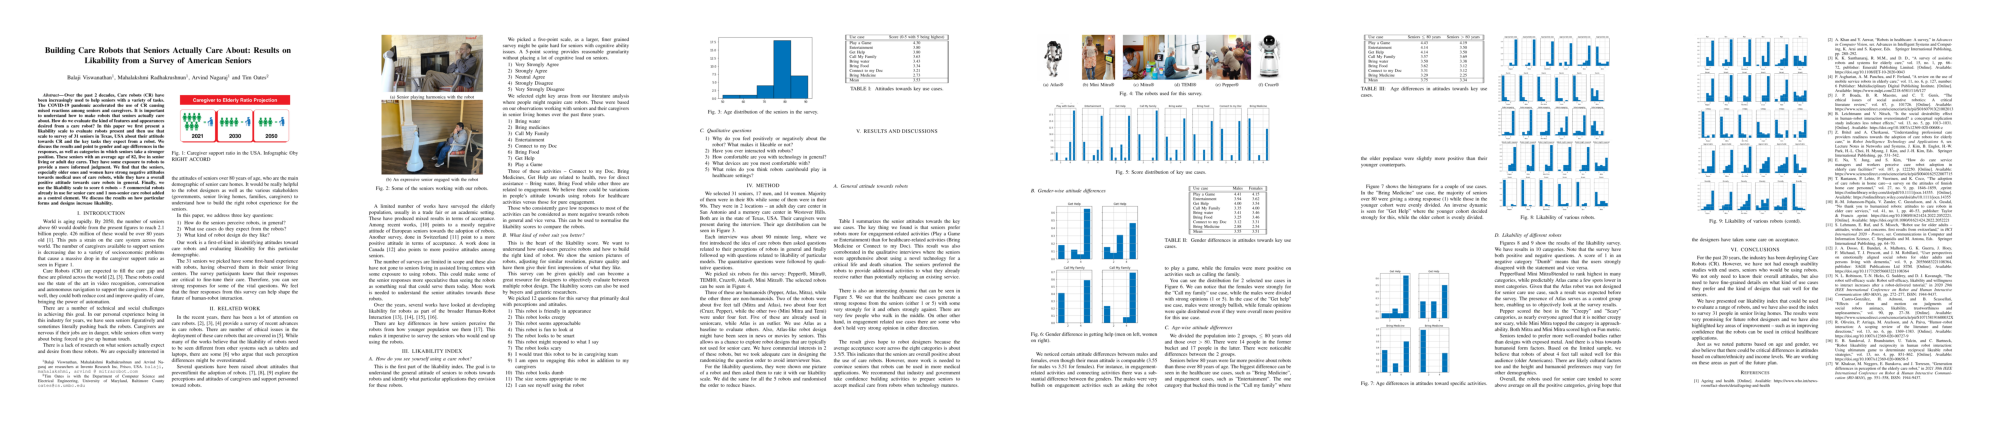

In [ ]:
import pdf2image
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
pdf_file = 'arso.pdf'

pages = convert_from_path(pdf_file, dpi=200)

num_pages_to_display = min(len(pages), 6)

fig, axes = plt.subplots(nrows=1, ncols=num_pages_to_display, figsize=(20, 15))

# Ensure axes is an iterable for the case of a single subplot
if num_pages_to_display == 1:
    axes = [axes]

for ax, page_image in zip(axes, pages[:num_pages_to_display]):
    ax.imshow(page_image)
    ax.axis('off')  # Hide axes for a cleaner visualization

plt.tight_layout()
plt.show()


**Use Transformations on the data with Unstructured**

In [ ]:
from unstructured.partition.pdf import partition_pdf

raw_pdf_elements = partition_pdf(
    filename="arso.pdf", # https://drive.google.com/file/d/1I8Ga_BK23OA8EEv3DtAmo5zw_Quud0ew/view?usp=sharing
    infer_table_structure=True,
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
titles = [el for el in raw_pdf_elements if el.category == "Title"]
for title in titles:
  print(title.category, title.text, title.metadata.page_number)

Title Building Care Robots that Seniors Actually Care About: Results on Likability from a Survey of American Seniors 1
Title I. INTRODUCTION 1
Title II. RELATED WORK 1
Title III. LIKABILITY INDEX 2
Title IV. METHOD 3
Title V. RESULTS AND DISCUSSIONS 3
Title (a) Atlas® 4
Title (b) Mini Mitra® 4
Title (c) Mitra® 4
Title (d) TEMI® 4
Title (e) Pepper® 4
Title (f) Cruzr® 4
Title VI. CONCLUSIONS 6
Title REFERENCES 6


In [ ]:
tables = [el for el in raw_pdf_elements if el.category == "Table"]
for table in tables:
  print(table.category, "Page number: ",table.metadata.page_number, table.metadata.coordinates)

Table Page number:  3 CoordinatesMetadata(points=((931.4716796875, 148.41552734375), (931.4716796875, 400.03997802734375), (1488.76806640625, 400.03997802734375), (1488.76806640625, 148.41552734375)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7d4a0c172f20>)
Table Page number:  4 CoordinatesMetadata(points=((1009.6937866210938, 948.5054931640625), (1009.6937866210938, 1212.1168212890625), (1416.5552978515625, 1212.1168212890625), (1416.5552978515625, 948.5054931640625)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7d4a0c1706a0>)
Table Page number:  5 CoordinatesMetadata(points=((164.36387634277344, 143.2136688232422), (164.36387634277344, 399.553466796875), (819.0381469726562, 399.553466796875), (819.0381469726562, 143.2136688232422)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7d49fb5f4520>)


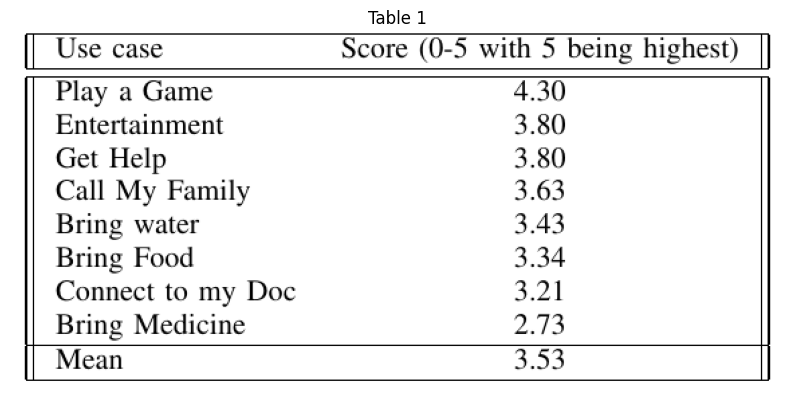

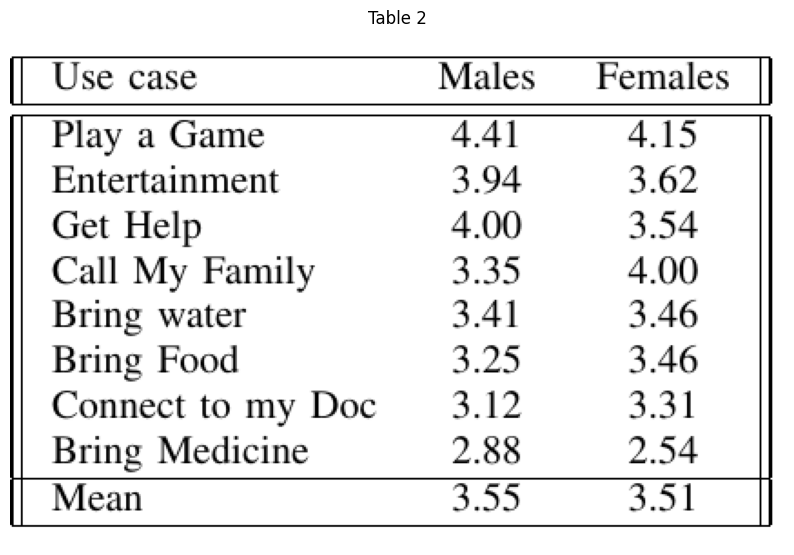

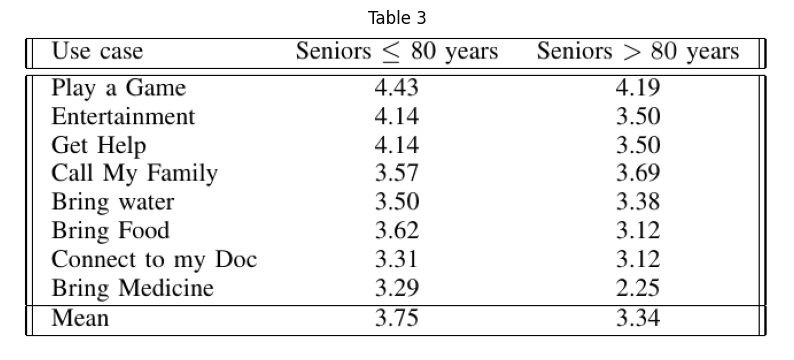

In [ ]:
for i, table in enumerate(tables):
    # Extracting coordinates and page number for the current table
    points = table.metadata.coordinates.points
    page_num = table.metadata.page_number - 1  # Adjusting for zero-based index
    page_image = pages[page_num]

    # Adding padding around the table region
    pad = 10
    left, upper = points[0][0] - pad, points[0][1] - pad
    right, lower = points[2][0] + pad, points[2][1] + pad

    # Crop the table region from the page image
    table_region = page_image.crop((left, upper, right, lower))

    # Display the cropped table region
    plt.figure(figsize=(10, 8))
    plt.imshow(table_region)
    plt.axis('off')  # Hide axes for better visualization
    plt.title(f"Table {i+1}")  # Title each figure with the table number
    plt.show()

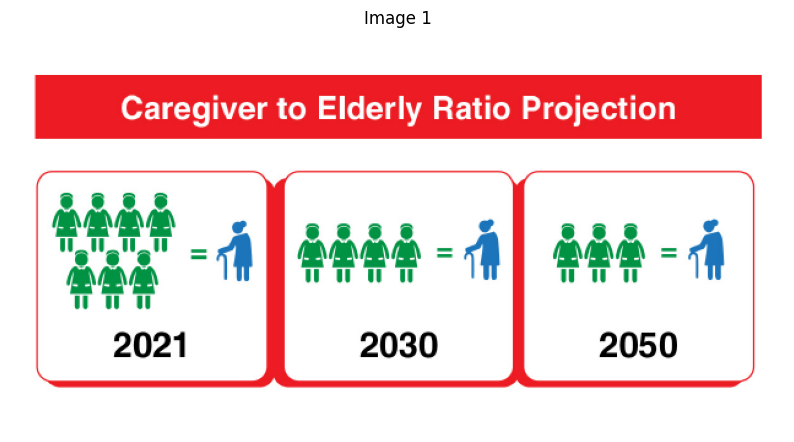

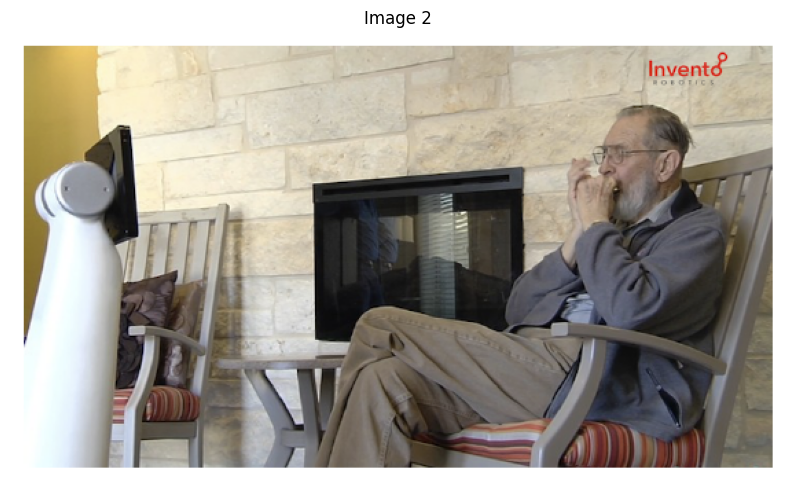

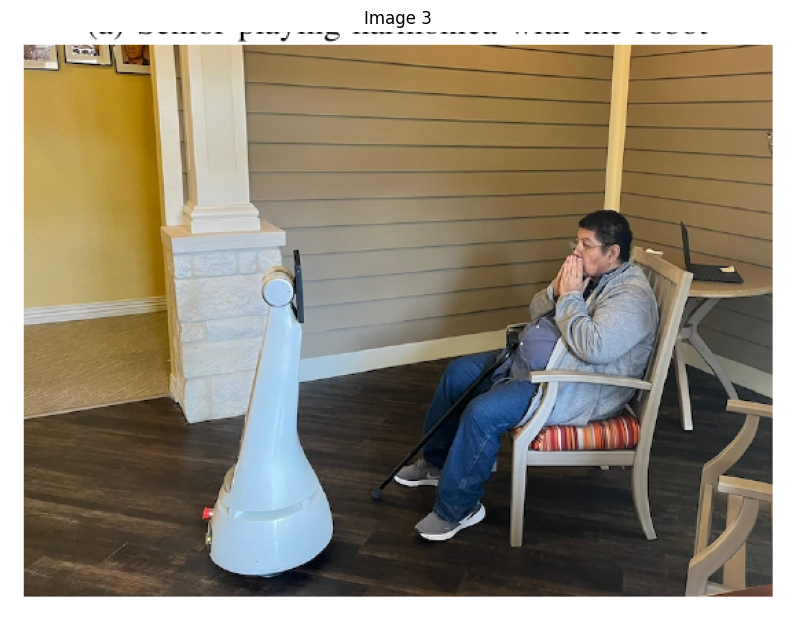

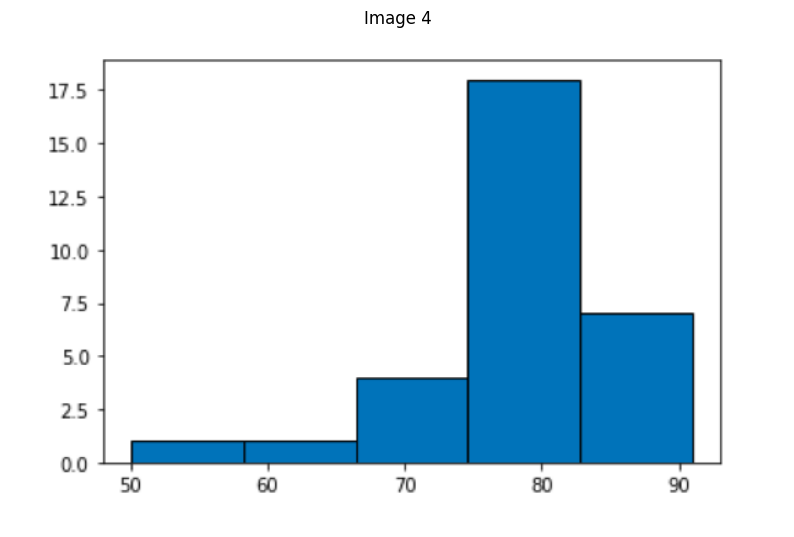

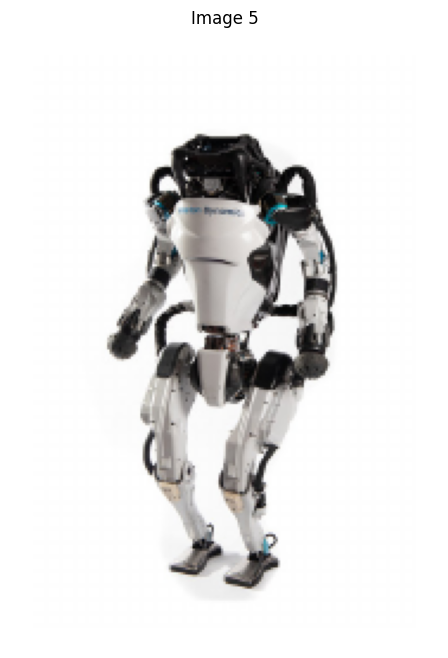

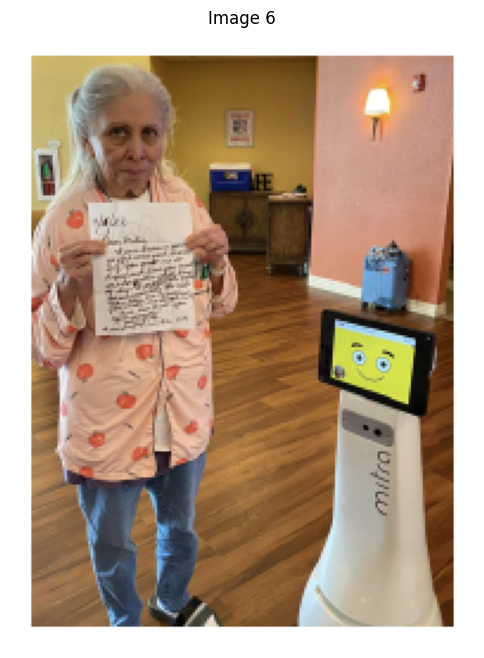

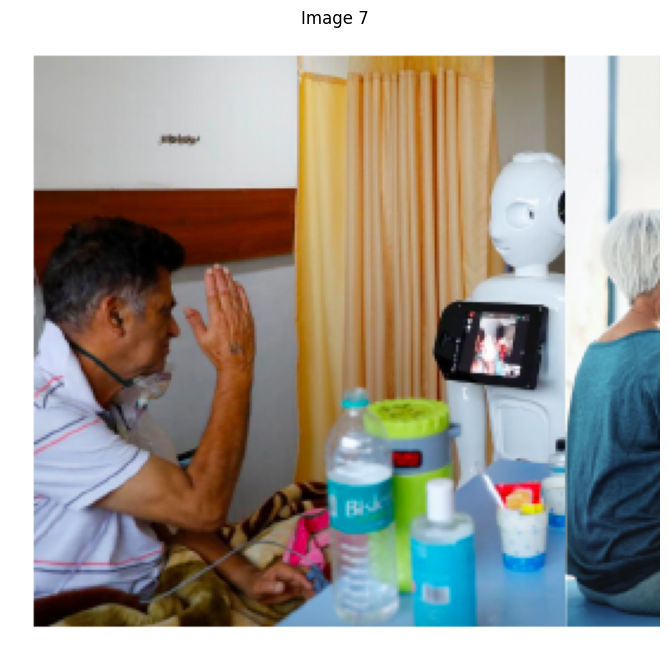

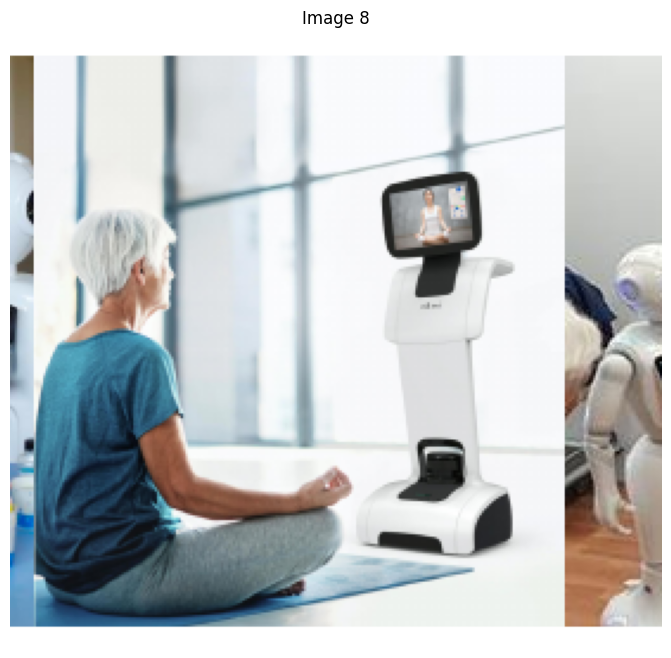

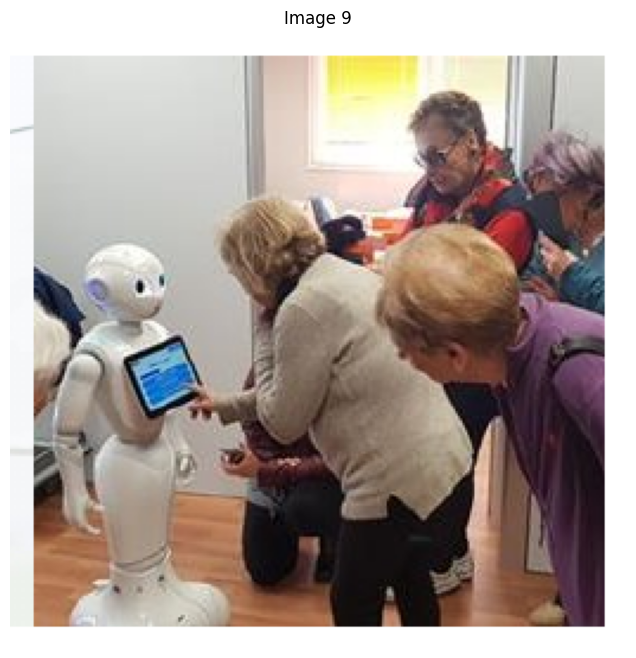

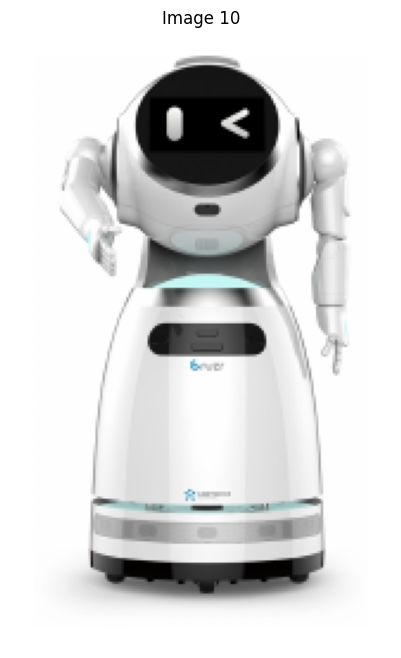

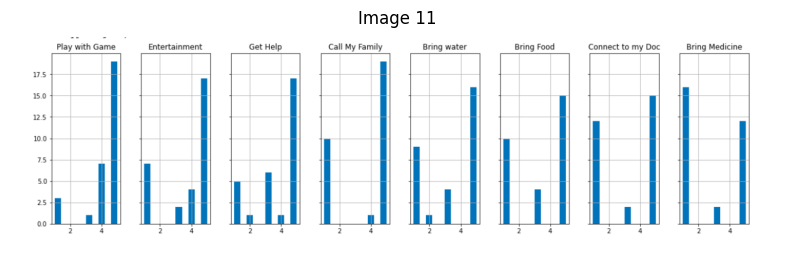

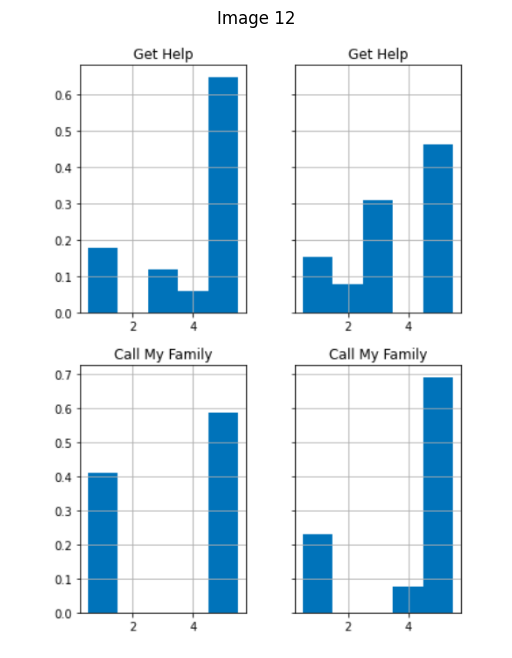

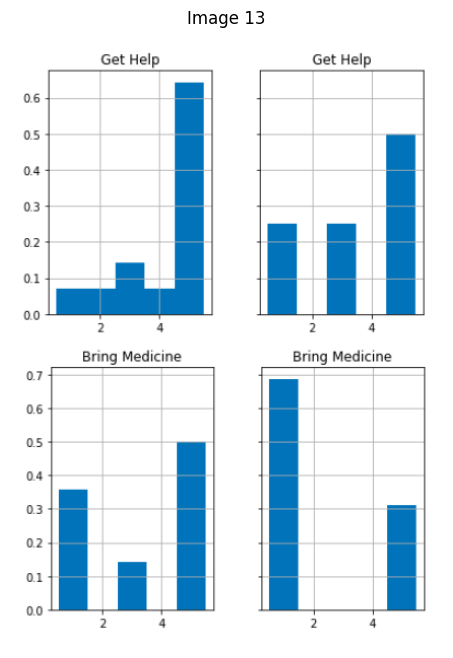

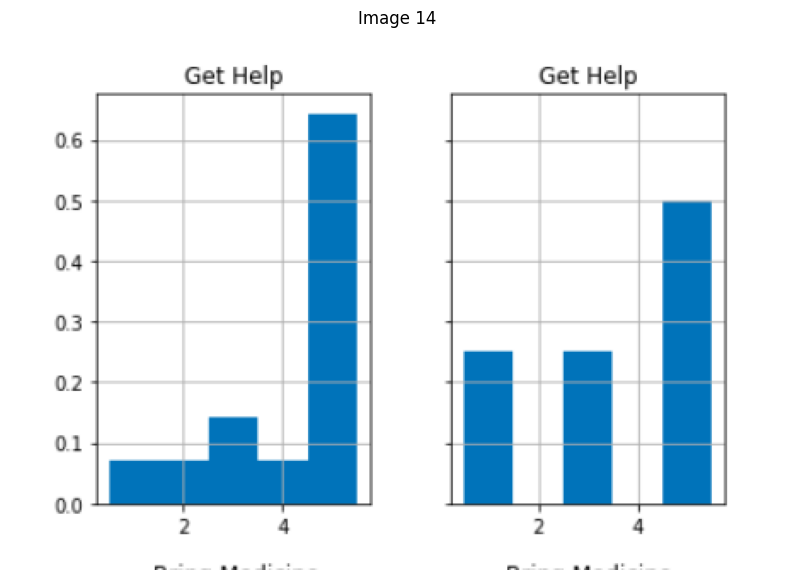

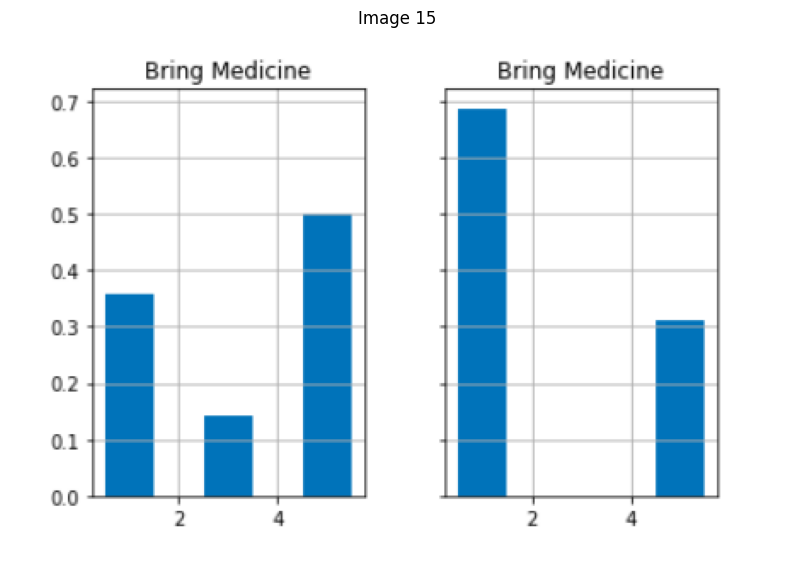

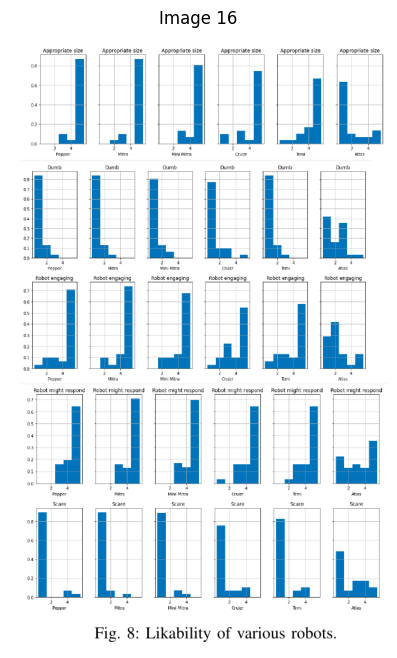

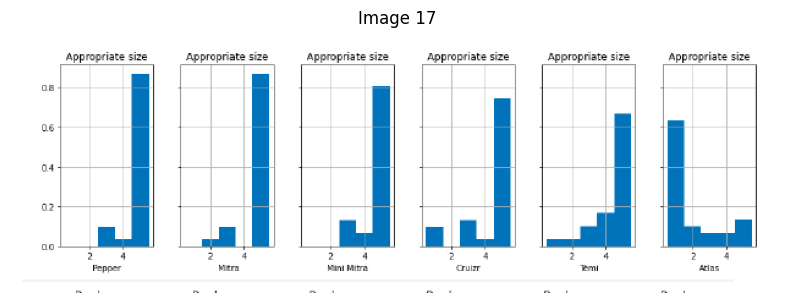

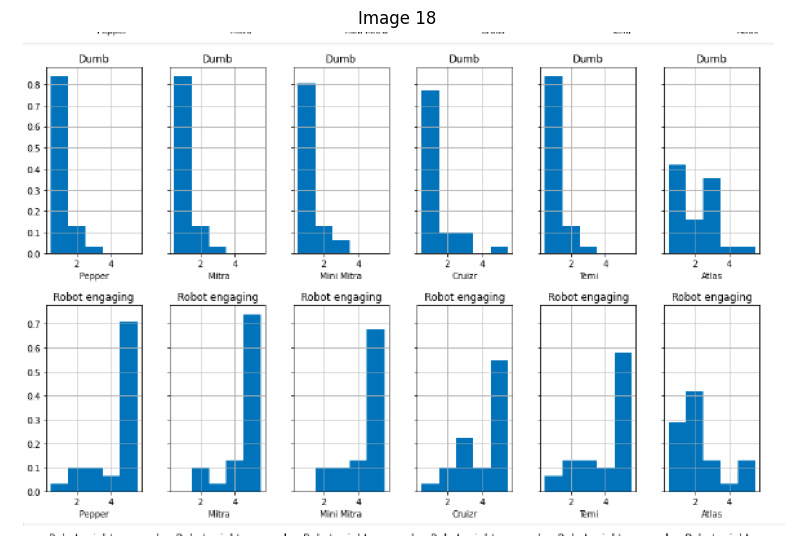

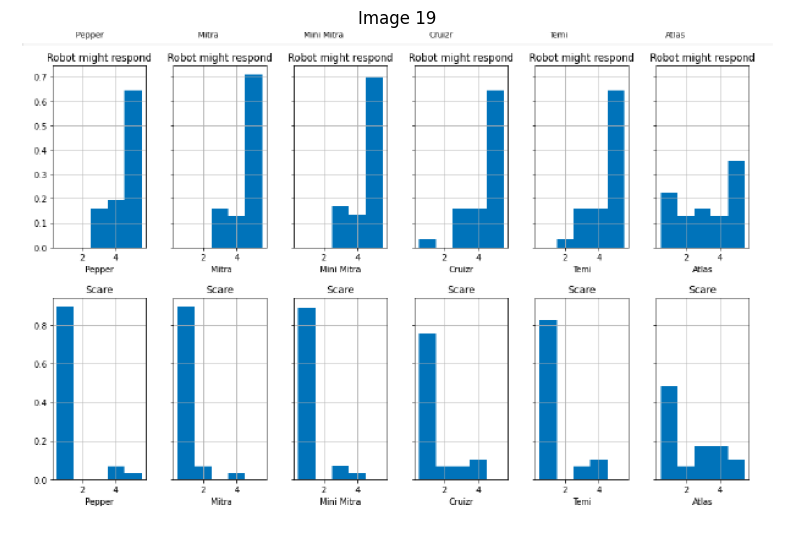

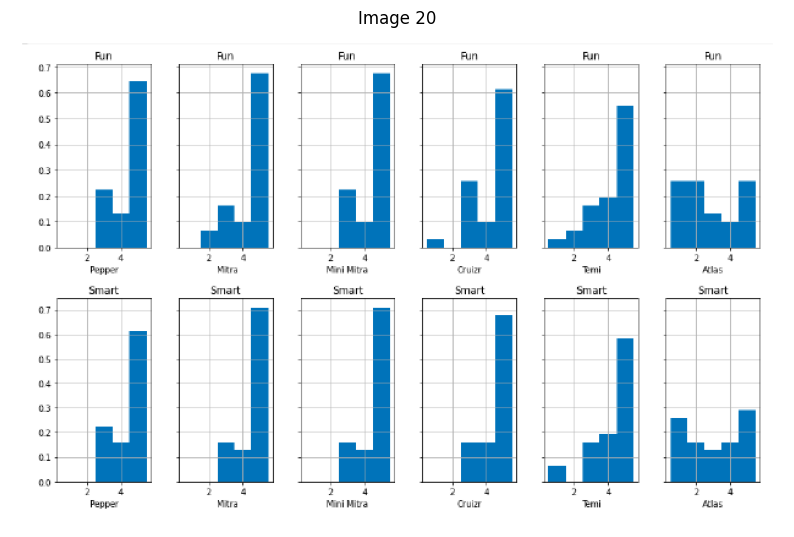

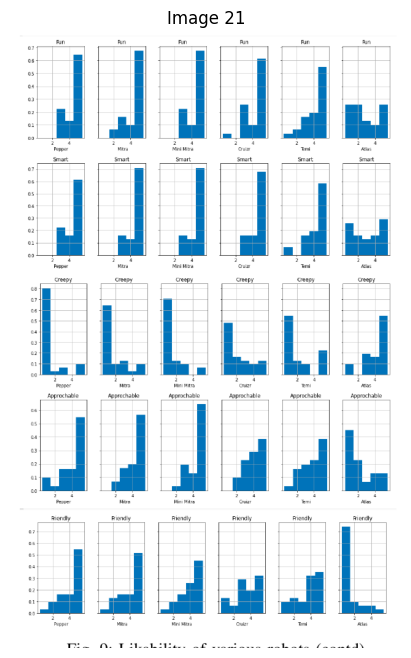

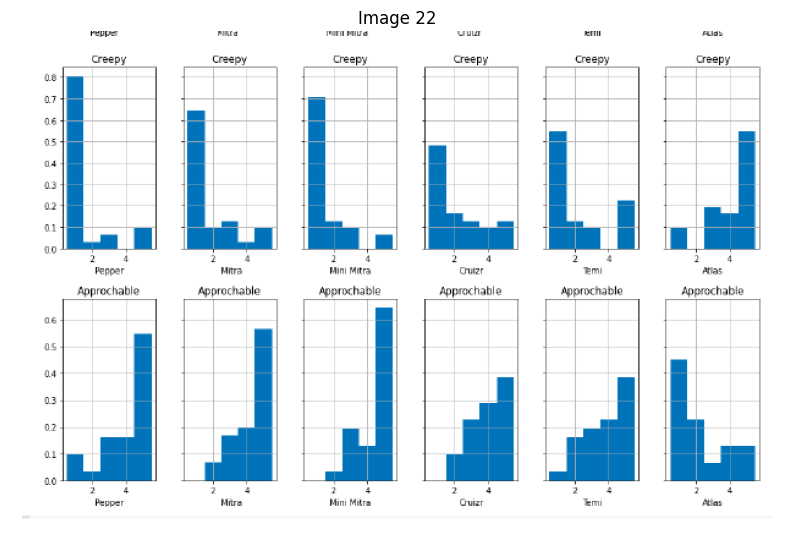

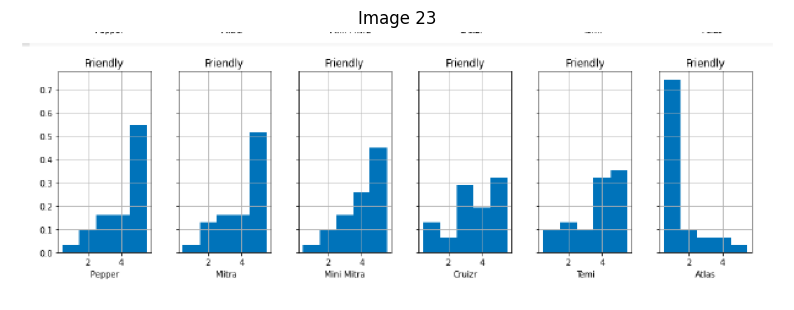

In [ ]:
images = [el for el in raw_pdf_elements if el.category == "Image"]
for i, img in enumerate(images):
    # Extracting coordinates and page number for the current table
    points = img.metadata.coordinates.points
    page_num = img.metadata.page_number - 1  # Adjusting for zero-based index
    page_image = pages[page_num]

    # Adding padding around the table region
    pad = 10
    left, upper = points[0][0] - pad, points[0][1] - pad
    right, lower = points[2][0] + pad, points[2][1] + pad

    # Crop the table region from the page image
    table_region = page_image.crop((left, upper, right, lower))

    # Display the cropped image region
    plt.figure(figsize=(10, 8))
    plt.imshow(table_region)
    plt.axis('off')  # Hide axes for better visualization
    plt.title(f"Image {i+1}")  # Title each figure with the Image number
    plt.show()

## Step 4: Analysis with GPT4 vision
We will pick one table and one image for detailed analysis.

In [ ]:
prompt = "Give me the HTML content to display this table. The approximate content is like this" + tables[1].text
prompt

'Give me the HTML content to display this table. The approximate content is like thisUse case Play a Game Entertainment Get Help Call My Family Bring water Bring Food Connect to my Doc Bring Medicine Mean Males 4.41 3.94 4.00 3.35 3.41 3.25 3.12 2.88 3.55 Females 4.15 3.62 3.54 4.00 3.46 3.46 3.31 2.54 3.51'

In [ ]:
table_index = 1
table = tables[table_index]

# Extracting coordinates and page number for the table
points = table.metadata.coordinates.points
page_num = table.metadata.page_number - 1
page_image = pages[page_num]

# Add padding around the table region
pad = 10
left, upper = points[0][0] - pad, points[0][1] - pad
right, lower = points[2][0] + pad, points[2][1] + pad

# Crop the table region from the page image
table_region = page_image.crop((left, upper, right, lower))

# Save the cropped table image temporarily
temp_image_path = 'temp_table_image.png'
table_region.save(temp_image_path)

In [ ]:
from llama_index.core.schema import ImageDocument
img = ImageDocument(image_path=temp_image_path)


# Send the image to GPT-4 for description
complete_response = mm_llm.complete(
    prompt=prompt,
    image_documents=[img],
)

from IPython.display import HTML
html_table = complete_response.text
HTML(html_table)

**Compare the output above with what Microsoft Table Transformers gave**

In [ ]:
from IPython.display import HTML
html_table = tables[1].metadata.text_as_html
HTML(html_table)

**Let's do the same for an image**

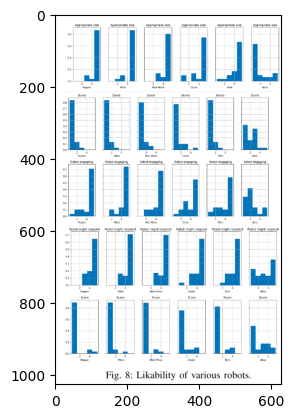

In [ ]:
img_index = 15
img = images[img_index]

# Extracting coordinates and page number for the table
points = img.metadata.coordinates.points
page_num = img.metadata.page_number - 1
page_image = pages[page_num]

# Add padding around the table region
pad = 10
left, upper = points[0][0] - pad, points[0][1] - pad
right, lower = points[2][0] + pad, points[2][1] + pad

# Crop the table region from the page image
table_region = page_image.crop((left, upper, right, lower))

# Save the cropped table image temporarily
temp_image_path = 'temp_image.png'
table_region.save(temp_image_path)
plt.imshow(table_region)

In [ ]:
img = ImageDocument(image_path=temp_image_path)

# Send the image to GPT-4 for description
complete_response = mm_llm.complete(
    prompt="Give me a detailed analysis of this chart. ",
    image_documents=[img],
)

print(complete_response.text)

This chart presents the likability of various robots as rated by participants in a study. The chart is divided into six rows and six columns, with each cell representing a different robot. The robots are labeled as "Dumbo," "Nao," "Robot engaging," "Robot not engaging," "Scaree," and "Alice." Each robot is evaluated on six different criteria: appropriate size, trust, robot engaging, robot not engaging, robot might respond, and robot might not respond.

The y-axis of each chart represents the likability score, ranging from 0 to 1, with 1 being the highest likability. The x-axis represents the frequency of the likability score given by the participants.

From the chart, we can observe that the robot "Dumbo" received the highest likability scores for appropriate size, trust, and robot engaging. The robot "Nao" also received high likability scores for appropriate size and trust, but lower scores for robot engaging. The robot "Robot engaging" received high likability scores for robot engagi